In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# import seaborn as sns
import palettable.colorbrewer.diverging as pld
import palettable as pt

import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
import palettable
palette2 = palettable.colorbrewer.diverging.RdYlGn_8_r
RdYlGn_8_r = palette2.mpl_colormap
palette2.mpl_colors

[(0.10196078431372549, 0.596078431372549, 0.3137254901960784),
 (0.4, 0.7411764705882353, 0.38823529411764707),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.8509803921568627, 0.9372549019607843, 0.5450980392156862),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.8431372549019608, 0.18823529411764706, 0.15294117647058825)]

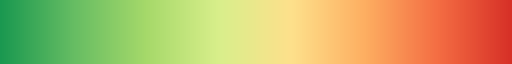

In [5]:
RdYlGn_8_r

In [6]:
palette2.hex_colors

['#1A9850',
 '#66BD63',
 '#A6D96A',
 '#D9EF8B',
 '#FEE08B',
 '#FDAE61',
 '#F46D43',
 '#D73027']

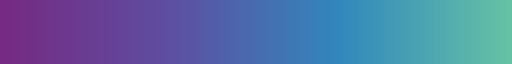

In [7]:
from matplotlib.colors import LinearSegmentedColormap
colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]
BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

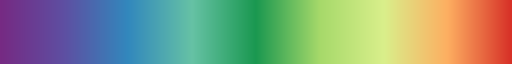

In [8]:
RdGnpu_mpl_colors: list = [
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
    
    (0.10196078431372549, 0.596078431372549, 0.3137254901960784), 
    
    # (0.4, 0.7411764705882353, 0.38823529411764707), 
    (0.6509803921568628, 0.8509803921568627, 0.41568627450980394), 
    (0.8509803921568627, 0.9372549019607843, 0.5450980392156862), 
    # (0.996078431372549, 0.8784313725490196, 0.5450980392156862), 
    (0.9921568627450981, 0.6823529411764706, 0.3803921568627451), 
    # (0.9568627450980393, 0.42745098039215684, 0.2627450980392157), 
    (0.8431372549019608, 0.18823529411764706, 0.15294117647058825), 
]
RdGnpu = LinearSegmentedColormap.from_list('RdGnpu', RdGnpu_mpl_colors, N=10000)
RdGnpu

In [9]:
from matplotlib.colors import rgb_to_hsv, to_hex
k = 9 #len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

i = 0
for kk in color_idx:
    hex_ = to_hex(cmap(kk))
    print(f'{i = }, {kk = }, {hex_ = }')
    i += 1

i = 0, kk = np.float64(0.0), hex_ = '#762a83'
i = 1, kk = np.float64(0.125), hex_ = '#5e4fa2'
i = 2, kk = np.float64(0.25), hex_ = '#3288bd'
i = 3, kk = np.float64(0.375), hex_ = '#66c2a5'
i = 4, kk = np.float64(0.5), hex_ = '#1a9850'
i = 5, kk = np.float64(0.625), hex_ = '#a6d96a'
i = 6, kk = np.float64(0.75), hex_ = '#d9ef8b'
i = 7, kk = np.float64(0.875), hex_ = '#fdae61'
i = 8, kk = np.float64(1.0), hex_ = '#d73027'


## Find path of .fgr files (exported fitting results by PDFgui)

In [10]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_3/'
fgr_identifier:str = os.path.join(folder_base, '**.fgr')
fgr_path:list = glob.glob(fgr_identifier)
fgr_path.sort()
fgr_basename:list = [os.path.basename(n) for n in fgr_path]
print(*fgr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.fgr
CsPbBr2-I_16micl_10m_20220331-174358_03721b_primary-1_mean_q.fgr
CsPbBr2-I_32micl_10m_20220331-170247_0063a7_primary-1_mean_q.fgr
CsPbBr2-I_64micl_10m_20220331-162851_06d064_primary-1_mean_q.fgr
CsPbBr2-I_8micl_10m_20220331-181657_70819d_primary-1_mean_q.fgr
CsPbBr3_CsPbBr2_10m.fgr


## Find path of G(r)

In [11]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/'
gr_identifier:str = os.path.join(folder_base, 'Halide Exchange Data', 'CsPb**.gr')
gr_path:list = glob.glob(gr_identifier)
gr_path.sort()
gr_basename:list = [os.path.basename(n) for n in gr_path]
print(*gr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.gr
CsPbBr2-I_16micl_10m_20220331-174358_03721b_primary-1_mean_q.gr
CsPbBr2-I_32micl_10m_20220331-170247_0063a7_primary-1_mean_q.gr
CsPbBr2-I_64micl_10m_20220331-162851_06d064_primary-1_mean_q.gr
CsPbBr2-I_8micl_10m_20220331-181657_70819d_primary-1_mean_q.gr
CsPbBr2_10m_20220330-230818_e61560_primary-1_mean_q.gr


## Organize data key and fgr path as a data dictonary 

In [12]:
data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']
data_dict:dict = {}
for key in data_keys:
    for _path in fgr_path:
        basename = os.path.basename(_path)
        if key in basename:
            data_dict.update({key: _path})

data_dict

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_3/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_3/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_3/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_3/CsPbBr2-Cl_8micl_10m_20220331-013211_

In [13]:
# data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']
data_dict2:dict = {}
for key in data_keys:
    for _path in gr_path:
        basename = os.path.basename(_path)
        if key in basename:
            data_dict2.update({key: _path})

data_dict2

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed

In [14]:
def is_float(s):    
    """
    Checks if a string can be successfully converted to a float.
    
    Args:
    s: The string to check.
    
    Returns:
    True if the string can be converted to a float, False otherwise.
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True):

    cont_01 = []
    with open(fn, 'r') as f:
        cont = f.readlines()
        f.close()
    
    for line in cont:
        new_line = line.strip('\n').split(sep)
        cont_01.append(new_line)

    i = 0
    while i < len(cont_01):
        c0 = (len(cont_01[i]) == num_data_column)
        c1 = all([len(l)==num_data_column for l in cont_01[i:i+check_range]])
        c2 = (is_float(cont_01[i][0]) and is_float(cont_01[i][1]))

        if check_float:
            if c0 and c1 and c2:
                # print(f'Num of rows of header is {i}.')
                break
        else:
            if c0 and c1:
                # print(f'Num of rows of header is {i}.')
                break
            
        i += 1

    return i

## Read fgr data into pandas

In [15]:
fgr_df:pd.DataFrame = pd.DataFrame()
fgr_df2:pd.DataFrame = pd.DataFrame()
for key, fn in data_dict.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=5, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r(A)', 'G(r)', 'd_r', 'd_Gr', 'Gdiff'], skiprows=skiprows)
    fgr_df[f'r_{key}'] = df['r(A)']
    fgr_df[f'g_{key}'] = df['G(r)']
    fgr_df[f'dr_{key}'] = df['d_r']
    fgr_df[f'dg_{key}'] = df['d_Gr']
    fgr_df[f'dif_{key}'] = df['Gdiff']

    fgr_df2[f'gr_{key}'] = df['G(r)']

fgr_df

,r_Cl_64micl,g_Cl_64micl,dr_Cl_64micl,dg_Cl_64micl,dif_Cl_64micl,r_Cl_32micl,g_Cl_32micl,dr_Cl_32micl,dg_Cl_32micl,dif_Cl_32micl,...,r_I_32micl,g_I_32micl,dr_I_32micl,dg_I_32micl,dif_I_32micl,r_I_64micl,g_I_64micl,dr_I_64micl,dg_I_64micl,dif_I_64micl
0,2.49,-0.447408,0.0,0.108853,0.108853,2.49,-0.431091,0.0,0.074957,0.074957,...,2.49,-0.338116,0.0,0.032484,0.032484,2.49,-0.273249,0.0,0.040110,0.040110
1,2.50,-0.445507,0.0,0.122081,0.122081,2.50,-0.430506,0.0,0.099074,0.099074,...,2.50,-0.338546,0.0,0.043524,0.043524,2.50,-0.273714,0.0,0.052151,0.052151
2,2.51,-0.442208,0.0,0.133011,0.133011,2.51,-0.428874,0.0,0.121449,0.121449,...,2.51,-0.338597,0.0,0.054550,0.054550,2.51,-0.273852,0.0,0.063987,0.063987
3,2.52,-0.437318,0.0,0.141254,0.141254,2.52,-0.426030,0.0,0.141483,0.141483,...,2.52,-0.338266,0.0,0.065299,0.065299,2.52,-0.273662,0.0,0.075364,0.075364
4,2.53,-0.430647,0.0,0.146477,0.146477,2.53,-0.421802,0.0,0.158619,0.158619,...,2.53,-0.337551,0.0,0.075516,0.075516,2.53,-0.273148,0.0,0.086033,0.086033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,59.96,-0.009754,0.0,-0.013807,-0.013807,59.96,-0.012305,0.0,-0.018126,-0.018126,...,59.96,0.003102,0.0,0.000234,0.000234,59.96,0.000401,0.0,-0.003358,-0.003358
5748,59.97,-0.009835,0.0,-0.017326,-0.017326,59.97,-0.012252,0.0,-0.020723,-0.020723,...,59.97,0.003051,0.0,-0.000053,-0.000053,59.97,0.000393,0.0,-0.003945,-0.003945
5749,59.98,-0.009929,0.0,-0.020474,-0.020474,59.98,-0.012193,0.0,-0.022832,-0.022832,...,59.98,0.002996,0.0,-0.000174,-0.000174,59.98,0.000383,0.0,-0.004328,-0.004328
5750,59.99,-0.010035,0.0,-0.023172,-0.023172,59.99,-0.012128,0.0,-0.024412,-0.024412,...,59.99,0.002936,0.0,-0.000124,-0.000124,59.99,0.000370,0.0,-0.004496,-0.004496


## Read gr data into pandas

In [16]:
gr_df:pd.DataFrame = pd.DataFrame()
gr_df2:pd.DataFrame = pd.DataFrame()
for key, fn in data_dict2.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r(A)', 'G(r)'], skiprows=skiprows)
    gr_df[f'r_{key}'] = df['r(A)']
    gr_df[f'g_{key}'] = df['G(r)']
    # fgr_df[f'dr_{key}'] = df['d_r']
    # fgr_df[f'dg_{key}'] = df['d_Gr']
    # fgr_df[f'dif_{key}'] = df['Gdiff']

    gr_df2[f'gr_{key}'] = df['G(r)']

gr_df

,r_Cl_64micl,g_Cl_64micl,r_Cl_32micl,g_Cl_32micl,r_Cl_16micl,g_Cl_16micl,r_Cl_8micl,g_Cl_8micl,r_CsPbBr2_10m,g_CsPbBr2_10m,r_I_8micl,g_I_8micl,r_I_16micl,g_I_16micl,r_I_32micl,g_I_32micl,r_I_64micl,g_I_64micl
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,0.01,0.002540,0.01,0.001241,0.01,0.002726,0.01,-0.000795,0.01,0.007334,0.01,0.014485,0.01,0.008352,0.01,0.006401,0.01,0.004873
2,0.02,0.004941,0.02,0.002360,0.02,0.005331,0.02,-0.001593,0.02,0.014406,0.02,0.028479,0.02,0.016407,0.02,0.012578,0.02,0.009576
3,0.03,0.007074,0.03,0.003243,0.03,0.007703,0.03,-0.002395,0.03,0.020972,0.03,0.041519,0.03,0.023883,0.03,0.018319,0.03,0.013946
4,0.04,0.008823,0.04,0.003790,0.04,0.009738,0.04,-0.003203,0.04,0.026801,0.04,0.053170,0.04,0.030518,0.04,0.023428,0.04,0.017833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,99.96,0.008268,99.96,0.005462,99.96,0.004148,99.96,0.003926,99.96,0.001367,99.96,0.003817,99.96,0.000917,99.96,-0.001713,99.96,0.002545
9997,99.97,0.006158,99.97,0.003130,99.97,0.003501,99.97,0.003629,99.97,0.001348,99.97,0.003188,99.97,0.000055,99.97,-0.001865,99.97,0.002201
9998,99.98,0.003940,99.98,0.000751,99.98,0.002796,99.98,0.003284,99.98,0.001362,99.98,0.002522,99.98,-0.000804,99.98,-0.001957,99.98,0.001802
9999,99.99,0.001678,99.99,-0.001610,99.99,0.002050,99.99,0.002898,99.99,0.001409,99.99,0.001841,99.99,-0.001632,99.99,-0.001989,99.99,0.001356


In [17]:
data_keys[:4][::-1]

['Cl_8micl', 'Cl_16micl', 'Cl_32micl', 'Cl_64micl']

In [18]:
Cl_keys = data_keys[:4][::-1]

In [19]:
data_keys[5:]

['I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']

In [20]:
I_keys = data_keys[5:]

## Plot data

In [21]:
gr_df[f'g_{data_keys[0]}']

0        0.000000
1        0.002540
2        0.004941
3        0.007074
4        0.008823
           ...   
9996     0.008268
9997     0.006158
9998     0.003940
9999     0.001678
10000   -0.000566
Name: g_Cl_64micl, Length: 10001, dtype: float64

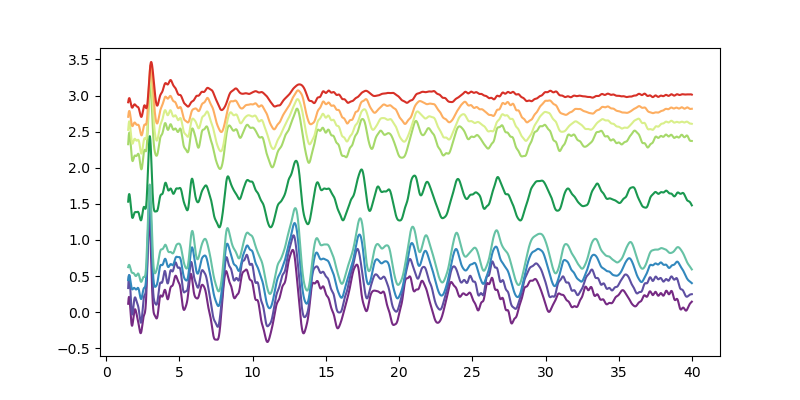

In [27]:
gs = GridSpec(nrows=1, ncols=1,) #height_ratios=[1.0, 1.0])
f0 = plt.figure(figsize=(8, 4), constrained_layout=True)
ax0 = f0.add_subplot(gs[:,:])

k = len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

y_offset = 0.2
x_min = 150
x_max = 4000

for i in range(0, k, 1):

    if i==3 or i==4:
        _offset = 0.8
    else:
        _offset = 0.2
        
    ax0.plot(gr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
             gr_df[f'g_{data_keys[i]}'].iloc[x_min:x_max]+y_offset, 
             label=f'{data_keys[i]}', 
             color=cmap(color_idx[i]))
    
    y_offset = y_offset + _offset

# ax0.legend(bbox_to_anchor=(1.0, 0.2), loc='lower left', ncol=1)
# ax0 = f0.add_subplot(gs[1,:])
# k = len(I_keys)
# color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.diverging.RdYlGn_11_r
# cmap = palette.mpl_colormap

# for i in range(0, k, 1):
#     ax0.plot(fgr_df[f'r_{I_keys[i]}'].iloc[x_min:x_max], 
#              fgr_df[f'g_{I_keys[i]}'].iloc[x_min:x_max]+y_offset*i, 
#              label=f'{I_keys[i]}', 
#              color=cmap(color_idx[i]))


In [23]:
from matplotlib.colors import rgb_to_hsv, to_hex
k = len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

i = 0
for kk in color_idx:
    hex_ = to_hex(cmap(kk))
    print(f'{i = }, {kk = }, {hex_ = }')
    i += 1

i = 0, kk = np.float64(0.0), hex_ = '#762a83'
i = 1, kk = np.float64(0.125), hex_ = '#5e4fa2'
i = 2, kk = np.float64(0.25), hex_ = '#3288bd'
i = 3, kk = np.float64(0.375), hex_ = '#66c2a5'
i = 4, kk = np.float64(0.5), hex_ = '#1a9850'
i = 5, kk = np.float64(0.625), hex_ = '#a6d96a'
i = 6, kk = np.float64(0.75), hex_ = '#d9ef8b'
i = 7, kk = np.float64(0.875), hex_ = '#fdae61'
i = 8, kk = np.float64(1.0), hex_ = '#d73027'


In [24]:
cmap(kk)[:3]

(np.float64(0.8431372549019608),
 np.float64(0.18823529411764706),
 np.float64(0.15294117647058825))

In [25]:
plt.close('all')

In [26]:
data_keys

['Cl_64micl',
 'Cl_32micl',
 'Cl_16micl',
 'Cl_8micl',
 'CsPbBr2_10m',
 'I_8micl',
 'I_16micl',
 'I_32micl',
 'I_64micl']